!conda create -n deep-learning -y python=3.11

!conda activate deep-learning

!pip install scikit-learn

!pip install tensorflow

!conda install -y matplotlib pandas

In [1]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [2]:
import sklearn
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Nos trae divididas las X de las Y

In [4]:
X = housing.data
y = housing.target

In [5]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y)
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full)

In [7]:
len(X_train)

11610

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [9]:
X_train

array([[ 0.7536203 , -0.28383286,  0.58385913, ...,  0.0100846 ,
        -0.7623323 ,  0.79656175],
       [ 5.91948653,  1.38834213,  0.25514664, ..., -0.0406767 ,
         0.88294329, -1.2878378 ],
       [-1.21884099, -1.39861619, -0.2826331 , ..., -0.06791562,
        -0.56546172,  1.13066407],
       ...,
       [-0.26515324,  0.11430404,  0.02020254, ..., -0.02005541,
        -0.27484324,  0.86637417],
       [-0.19565395,  1.38834213, -0.30088752, ..., -0.03550422,
        -0.63108525,  0.15329012],
       [ 0.37953648,  0.11430404, -0.56835132, ..., -0.09557178,
        -0.84201802,  0.58213787]])

In [10]:
import numpy as np


np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# Los valores son muy parejos, por lo que no haremos un Scaler

y_train

array([2.976  , 5.00001, 1.083  , ..., 0.718  , 2.212  , 5.00001])

In [12]:
# Va ser muy común para ver lo que tenemos de forma del tensor

X_train.shape

(11610, 8)

## Tres formas de crear modelos de Redes con Keras

### 1º Van ser capas secuenciales donde añadiremos a la lista las capas que tengamos

In [13]:
# 1º Capa | Será una tupla de como tiene 8 columnas será de (8)
# 2º Capa | Le vamos a dar 30 neuronas y con función de activación Relu
# 3º Capa | Queremos los valores de la salida actual en este caso, ya que la linealidad ya está rota


# Capa de activación

# Sigmoide si el valor oscila entre el 0 y 1 True or False
# Tangente hiperbólica entre -1 y 1
# ReLu, la más utilizada


lista_de_capas=[
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(30,activation="relu"),
    #keras.layers.Dense(30,activation="relu",iput_shape=(8,)), significa que hay antes una capa de entrada que le entran 8 por lo que nos ahorraríamos la primera línea (Input)
    keras.layers.Dense(1)
]

model = keras.models.Sequential(lista_de_capas)
#model = keras.Sequential(lista_de_capas)

In [14]:
model

<Sequential name=sequential, built=True>

In [15]:
# Compilamos el modelo actual, con la función de error que va utilizar, muchas veces nos la inventamos, pero si ya tiene una y le funciona bien vamos con el
# Le decimos que como optimizador utilice el Descenso del Gradiente, el cual podemos indicarle el Lr(Learning-Rate)
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=0.002))

In [16]:
# Nos enseña su estado actual

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Datos de validación y las vueltas que recorre

history = model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val))

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5051 - val_loss: 0.7802
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.7073 - val_loss: 0.7096
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.6443 - val_loss: 0.6689
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6068 - val_loss: 0.6361
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.5794 - val_loss: 0.6100
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5571 - val_loss: 0.5885
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.5390 - val_loss: 0.5707
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.5241 - val_loss: 0.5560
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.5116 - val_loss: 0.5437
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5011 - val_loss: 0.5335
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.4922 - val_loss: 0.5246
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━

In [18]:
history.history

{'loss': [1.4381481409072876,
  0.6868067383766174,
  0.6342532634735107,
  0.6004883646965027,
  0.5749102830886841,
  0.5542071461677551,
  0.5373366475105286,
  0.5233622789382935,
  0.5116440057754517,
  0.501842737197876,
  0.4935147166252136,
  0.4862520396709442,
  0.47990408539772034,
  0.4743138551712036,
  0.46936097741127014,
  0.4648803770542145,
  0.4607289135456085,
  0.45688748359680176,
  0.453391969203949,
  0.4502718150615692,
  0.4473770260810852,
  0.44467830657958984,
  0.4422449469566345,
  0.44003069400787354,
  0.438007652759552,
  0.43616899847984314,
  0.4344313442707062,
  0.4328068196773529,
  0.4312673509120941,
  0.4297945201396942],
 'val_loss': [0.7802060842514038,
  0.7095908522605896,
  0.6689454913139343,
  0.6361185908317566,
  0.6099883913993835,
  0.5884907841682434,
  0.5707237720489502,
  0.555966854095459,
  0.5437331795692444,
  0.5335315465927124,
  0.5246276259422302,
  0.516964852809906,
  0.5102798938751221,
  0.5044154524803162,
  0.499035

<Axes: >

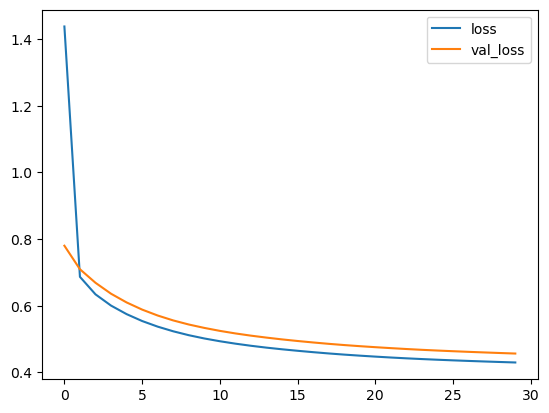

In [19]:
import pandas as pd

# Cuando hay una separación notable tras cruzada es el sobreentrenamiento
pd.DataFrame(history.history).plot()

In [20]:
mse_test = model.evaluate(X_test,y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.4414


0.4274504482746124

In [21]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [22]:
print(y_nueva)
print(y_test[:3])

[[1.8538384]
 [3.0898077]
 [1.9760113]]
[1.469 2.542 1.388]


In [23]:
model.save(path+"model_prueba.keras")

In [24]:
model = keras.models.load_model(path+"model_prueba.keras")

## GUARDANDO EPOCH

In [25]:
# Datos de validación y las vueltas que recorre



import sys

#input = keras.layers.Input(shape=(8,)),
#hidden = keras.layers.Dense(30,activation="relu"),
#output = keras.layers.Dense(1)
#
#model = keras.models.Model([hidden],inputs=[input],outputs=[output])
model = keras.models.Sequential(lista_de_capas)
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=0.002))

checkpoint_cb = keras.callbacks.ModelCheckpoint(path+'model_keras_callbacks.keras',save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=sys.maxsize,validation_data=(X_val,y_val),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4238 - val_loss: 0.4551
Epoch 2/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.4224 - val_loss: 0.4536
Epoch 3/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.4211 - val_loss: 0.4522
Epoch 4/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.4198 - val_loss: 0.4508
Epoch 5/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.4186 - val_loss: 0.4494
Epoch 6/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4174 - val_loss: 0.4481
Epoch 7/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4162 - val_loss: 0.4469
Epoch 8/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.4151 - val_loss: 0.4457
Epoch 9/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4140 - val_loss: 0.4445
Epoch 10/9223372036854775807
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 99

<Axes: >

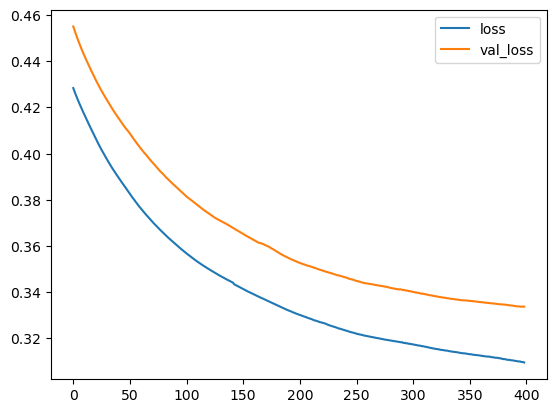

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.3329


0.32034361362457275

In [29]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)
print(y_nueva)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[1.5798833]
 [2.7825165]
 [1.5894217]]
[1.469 2.542 1.388]


## TensorBoard

In [ ]:
!pip install tensorboard

In [46]:
#TensorBoard
root_logdir = os.path.join(".", "my_logs")
#root_logdir = "./my_logs"

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(root_logdir)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, tensorboard_cb])

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} .\my_logs is not a directory [Op:CreateSummaryFileWriter] name: 

In [34]:
"""
tensorboard --logdir = ./my_logs --port= 6006
"""

%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006